In [3]:
#Punto 1 Tarea 2 Solar Astrophysics
from astropy.io import fits 
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
#Modulation row de un disco retardador y polarizador
pi=np.pi
C=np.cos(127*pi/180)
S=np.sin(127*pi/180)
def modulation_row(alpha):
    row = np.zeros(4)
    row[0] = 1.0
    row[1] = 1 * np.cos(2.0*alpha)**2+np.sin(2.0*alpha)**2*C
    row[2] = 1 * np.cos(2.0*alpha)*np.sin(2.0*alpha)*(1-C)
    row[3] = -1 * np.sin(2.0*alpha)*S
    row = row.reshape(1,4)
    return row

In [ ]:
print(modulation_row(pi/16))

In [7]:
O8=(modulation_row(pi/16))
O8=np.concatenate([O8,modulation_row(3*pi/16)],axis=0)
O8=np.concatenate([O8,modulation_row(5*pi/16)],axis=0)
O8=np.concatenate([O8,modulation_row(7*pi/16)],axis=0)
O8=np.concatenate([O8,modulation_row(9*pi/16)],axis=0)
O8=np.concatenate([O8,modulation_row(11*pi/16)],axis=0)
O8=np.concatenate([O8,modulation_row(13*pi/16)],axis=0)
O8=np.concatenate([O8,modulation_row(15*pi/16)],axis=0)

In [8]:
print(O8) #Matriz de modulación para el esquema

[[ 1.          0.76541962  0.56632713 -0.30562458]
 [ 1.         -0.36723464  0.56632713 -0.737843  ]
 [ 1.         -0.36723464 -0.56632713 -0.737843  ]
 [ 1.          0.76541962 -0.56632713 -0.30562458]
 [ 1.          0.76541962  0.56632713  0.30562458]
 [ 1.         -0.36723464  0.56632713  0.737843  ]
 [ 1.         -0.36723464 -0.56632713  0.737843  ]
 [ 1.          0.76541962 -0.56632713  0.30562458]]


In [9]:
O8_inv = np.linalg.pinv(O8)
print(O8_inv) #Matriz inversa

[[ 0.08105621  0.16894379  0.16894379  0.08105621  0.08105621  0.16894379
   0.16894379  0.08105621]
 [ 0.22072049 -0.22072049 -0.22072049  0.22072049  0.22072049 -0.22072049
  -0.22072049  0.22072049]
 [ 0.22072049  0.22072049 -0.22072049 -0.22072049  0.22072049  0.22072049
  -0.22072049 -0.22072049]
 [-0.11979289 -0.28920563 -0.28920563 -0.11979289  0.11979289  0.28920563
   0.28920563  0.11979289]]


In [10]:
print (1./np.sqrt(8.*np.sum(O8_inv**2.0,axis=1))) #Eficiencias

[0.94340142 0.56632713 0.56632713 0.56472058]


In [11]:
#Cub de datos
datacube = fits.open("6300_synth.fits")
datacube.info()

Filename: 6300_synth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (131, 4, 288, 288)   float64   
  1                1 ImageHDU         6   (131,)   float64   


In [13]:
stokes0 = datacube[0].data
ll = datacube[1].data

In [14]:
x_coordinate = 18
y_coordinate = 202
# Telescope / observing specifications: 
D = 4E2 #diameter in cm 
t = 1 #exposure in s 
dlambda = (ll[1] - ll[0])*1E-8 #lambda bin in cm
au = 150E11 # 1 AU in cm
a = 20E5 # pixel size "on the Sun" in cm
pi = np.pi # 3.14, we will use this often
deltaE = 6.626E-27 * 2.997E10/6300.E-8 # energy of one photon
conversion = a**2.0 * (D/2.)**2.0 * pi / au ** 2.0 * dlambda * 1 / deltaE
print (conversion)

1.4174890342993653e-07


In [15]:
stokes = stokes0 * conversion

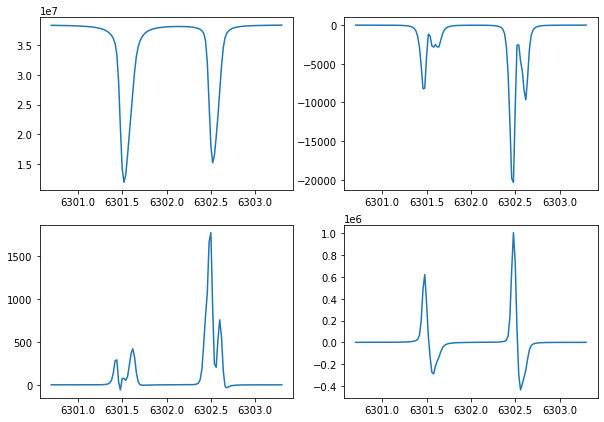

In [19]:
#Modulación y desmodulación con el esquema
I_original = stokes[x_coordinate,y_coordinate]
nl = len(ll)
S_measured = np.zeros([8,nl]) 
for l in range(0,nl):
    S_measured[:,l] = np.dot(O8,I_original[:,l])

I_inferred = np.zeros([4,nl])
#O4_inv = np.linalg.inv(O4)
for l in range(0,nl):
    I_inferred[:,l] = np.dot(O8_inv,S_measured[:,l])   
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.plot(ll,I_inferred[0])
plt.subplot(222)
plt.plot(ll,I_inferred[1])
plt.subplot(223)
plt.plot(ll,I_inferred[2])
plt.subplot(224)
plt.plot(ll,I_inferred[3])  

In [ ]:
#Se obtiene los mismos espectros que los vistos en clase con 4 y 6 medidas.